##Random Forest Example 1 - Churn Analysis

- only about 15% of data are positive (churn)

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 572.9+ KB


In [5]:
df["Int'l Plan"] = df["Int'l Plan"] == 'yes'
df["VMail Plan"] = df["VMail Plan"] == 'yes'
df["Churn?"] = df["Churn?"] == 'True.'
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Remove the features which aren't continuous or boolean

In [6]:
df_reduced = df.drop(['State', 'Area Code', 'Phone'], axis=1)
df_reduced.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
y = df_reduced.pop('Churn?').values
X = df_reduced.values

In [8]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)

In [11]:
score

0.94399999999999995

In [12]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[846,  12],
       [ 44,  98]])

In [13]:
metrics.precision_score(y_test, y_pred)

0.89090909090909087

In [14]:
metrics.recall_score(y_test, y_pred)

0.6901408450704225

In [16]:
rf_oob = RandomForestClassifier(n_estimators=20, oob_score=True)
rf_oob.fit(X_train, y_train)
print rf_oob.oob_score_
print score #really close with OOB score

0.939134162023
0.944


In [17]:
feature = pd.DataFrame(np.vstack((df_reduced.columns, rf.feature_importances_)).T)

In [18]:
feature.sort(1,0,ascending=False)

,0,1
4,Day Mins,0.1542645
6,Day Charge,0.1361074
16,CustServ Calls,0.1294756
9,Eve Charge,0.07510153
1,Int'l Plan,0.06399109
7,Eve Mins,0.05832903
15,Intl Charge,0.05023112
14,Intl Calls,0.04599459
11,Night Calls,0.04115806
0,Account Length,0.03701222


####Effects of number of trees on accuracy

/Users/Warren/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:373: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


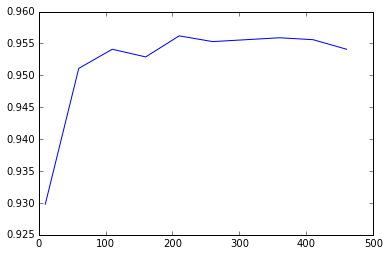

In [19]:
num_trees = np.arange(10, 500, 50)
oob_score = []
for n in num_trees:
    rf_oob = RandomForestClassifier(n_estimators=n, oob_score=True)
    rf_oob.fit(X, y)
    oob_score.append(rf_oob.oob_score_)
    
plt.plot(num_trees, oob_score)

###Effects of number of max number of features 

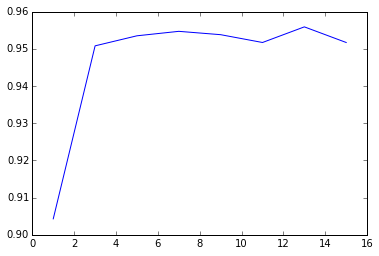

In [20]:
all_features = range(1, X.shape[1], 2)

oob_score = []
for a in all_features:
    rf_oob = RandomForestClassifier(n_estimators=100, max_features=a, oob_score=True)
    rf_oob.fit(X, y)
    oob_score.append(rf_oob.oob_score_)
    
plt.plot(all_features, oob_score)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

rf = RandomForestClassifier(n_estimators=300)
lr = LogisticRegression()
kNN = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
svc = SVC()
mnb = MultinomialNB()

models = [rf, lr, kNN, d_tree, svc, mnb]

for model in models:
    print model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print '  accuracy:', model.score(X_test, y_test)
    print '  precision:', metrics.precision_score(y_test, y_pred)
    print '  recall:', metrics.recall_score(y_test, y_pred)
    print

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)
  accuracy: 0.956
  precision: 0.953846153846
  recall: 0.765432098765

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)
  accuracy: 0.845
  precision: 0.577777777778
  recall: 0.16049382716

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')
  accuracy: 0.875
  precision: 0.776119402985
  recall: 0.320987654321

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, m

/Users/Warren/anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Warren/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.py:427: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  self.feature_count_ += safe_sparse_dot(Y.T, X)


####Random Forest did the best across all metrics

###Models with threshold parameters

In [25]:
import roc

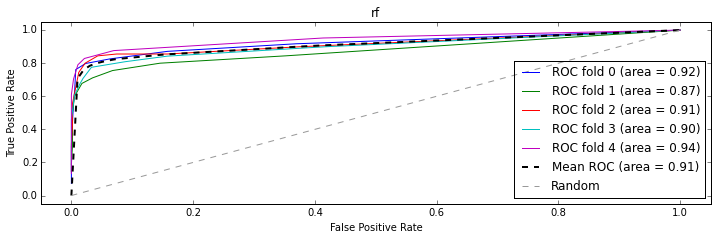

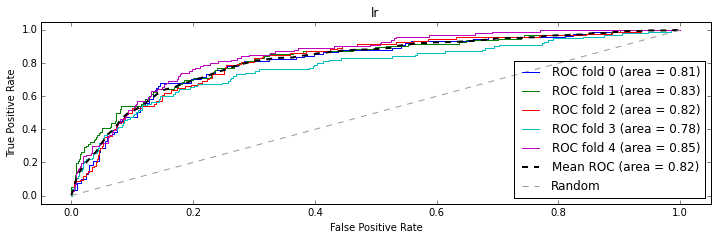

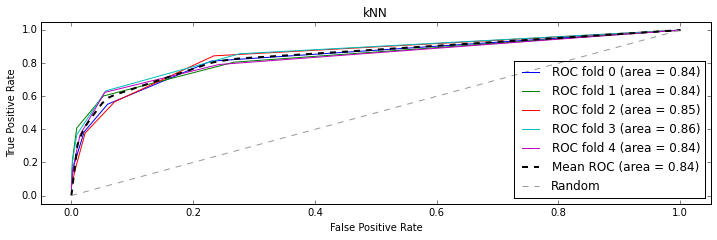

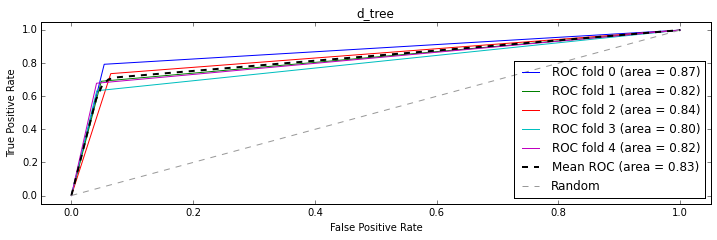

In [29]:
rf = RandomForestClassifier
lr = LogisticRegression
kNN = KNeighborsClassifier
d_tree = DecisionTreeClassifier

models = [rf, lr, kNN, d_tree]

titles = ['rf', 'lr', 'kNN', 'd_tree']

for i in xrange(len(models)):
    plt.figure(figsize=(12,15))
    plt.subplot(4, 1, i)
    roc.plot_roc(X, y, models[i])
    plt.title(titles[i])
plt.show()

#with 0.2 recall, kNN and rf do ok

###Visualizing feature importances

In [30]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)
lst = []
for dt in rf.estimators_:
    lst.append(dt.feature_importances_)
    
fts = np.array(lst)

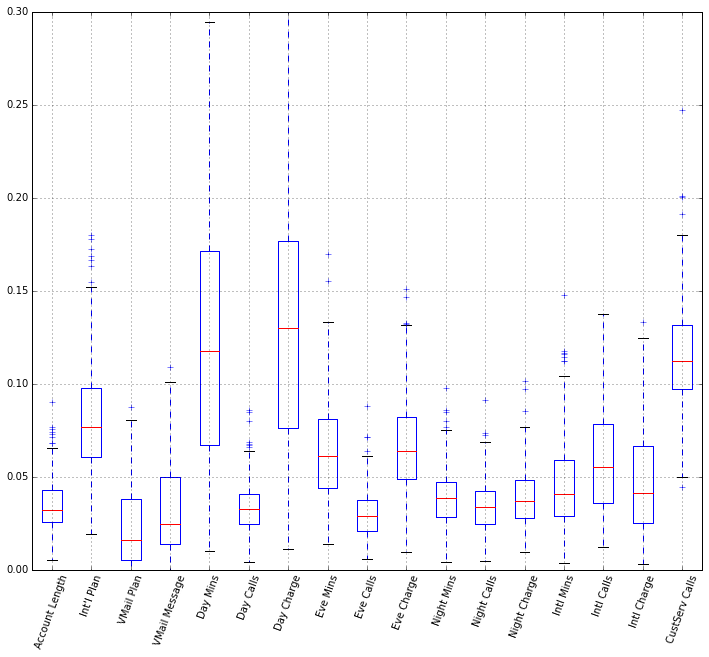

In [31]:
pd.DataFrame(fts, columns = df_reduced.columns).plot(kind='box', figsize=(12,10))
plt.xticks(rotation=70)
plt.show()

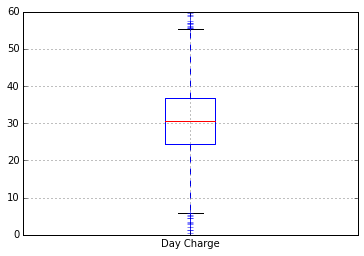

In [32]:
df['Day Charge'].plot(kind='box')

In [33]:
df[['Day Charge', 'Day Mins', 'CustServ Calls', 'Eve Mins', 'Eve Charge', 'Churn?']].reset_index().set_index('Churn?').unstack()

       Churn?
index  False      0
       False      1
       False      2
       False      3
       False      4
       False      5
       False      6
       False      7
       False      8
       False      9
       True      10
       False     11
       False     12
       False     13
       False     14
...
Eve Charge  False     25.54
            False     17.84
            True      16.69
            False      7.23
            True      22.57
            True      21.19
            False     16.80
            False      9.94
            False     24.21
            False     16.12
            False     18.32
            False     13.04
            False     24.55
            False     13.57
            False     22.60
Length: 19998, dtype: float64

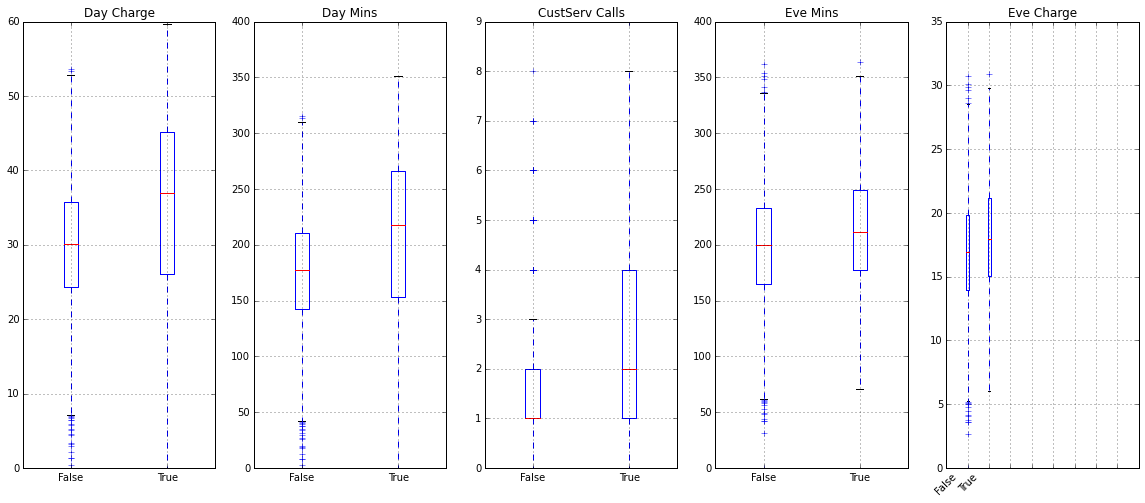

In [34]:
columns = ['Day Charge', 'Day Mins', 'CustServ Calls', 'Eve Mins', 'Eve Charge']
# df.reset_index().set_index(['index', 'Churn?']).groupby(level=[0, 1]).mean()[columns].unstack().plot(kind="box")
df_to_plot = df.reset_index().set_index(['index', 'Churn?']).groupby(level=[0, 1]).mean()[columns].unstack()
fig, ax = plt.subplots(1, 5, figsize=(20,8))
for i, c in enumerate(columns):
    df_to_plot[c].plot(kind="box", ax=ax[i], title=c)
plt.xticks(range(10), rotation=45)
plt.show()

##Example 2 - Titanic Data (In progress...)

https://www.kaggle.com/c/titanic

In [35]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [36]:
df = pd.read_csv('titanic.csv')

In [37]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [39]:
df.shape

(891, 11)

In [44]:
df.isnull().values.sum() #866 missing values

866

In [42]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
# Remove the Nan vals from the dataframe
df = df.dropna()
# 'y' is the target value we are trying to predict
y = df['survived'].values
# 'X' are our features, only categorical
X = df[['pclass', 'age', 'fare']].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [49]:
gbc = GradientBoostingClassifier()

# Here are the params we are tuning, ie, 
# if you look in the docs, all of these are 'nobs' 
# within the GradientBoostingClassifier. 
param_grid = {'learning_rate': [0.1, 0.05, 0.02],
              'max_depth': [2, 3],
              'min_samples_leaf': [3, 5],
              }

# Plug in our model, params dict, and the number of jobs, then .fit()
gs_cv = GridSearchCV(gbc, param_grid, n_jobs=2).fit(X_train, y_train)

# return the best score and the best params
print gs_cv.best_score_, gs_cv.best_params_

0.759124087591 {'learning_rate': 0.02, 'max_depth': 2, 'min_samples_leaf': 3}
